# This is our analysis workflow for the precisionFDA covid-19 challenge

The workflow has multiple components that can be modularized:

# Data Management [bash/sqlite]
 - Access the input data (flat files)
 - Data modeling (SQLite)
 output: SQLite database
 Test police: space, time?

# ETL
 - Input: SQLite db & user query [ python notebook ] MS constrained query
 (data transfer from python to R kernel using temp SQLite database)
 (exfiltrate usable data)



# Data Analysis [R]


  - Data Cleaning
  - Data Selection


# Data Ouput

# Input Data 

Data loading

# Getting data 

# Data Cleaning

In [4]:
getwd()

[1] "/home/fabulous_pharoh/Documents/Projects/covid_challenge/repo_tests/precisionFDA_Covid19"

In [7]:
library(reticulate)
use_virtualenv("/home/fabulous_pharoh/.local/share/virtualenvs/precisionFDA_Covid19-Fxx2Sb2x/",
              required = TRUE)


In [8]:
library(RSQLite)

In [10]:
# connection to seqtable
seq_db_path = 'dump.db'
conn <- dbConnect(RSQLite::SQLite(), seq_db_path)

In [18]:
# function that takes the SQLite database connection, a query selecting columns and
# user-identified rows
# the rows are found by specifying first and last row
getdfRows <- function(conn, query_rows){
    # connection to queried table
    seq_db_path = 'dump.db'
    conn <- dbConnect(RSQLite::SQLite(), seq_db_path)
    query_rows = 'SELECT * FROM df_analysis'
    df = dbGetQuery(conn,query_rows)
    return(df)
}

Generate dataframe instance

In [19]:
df1 = getdfRows()

In [33]:
#df1 = getdfRows()

Clean data

In [27]:
# remove blank sequences
clean_df <- function(df){
      
    cleaned_df <- df[
        df$junction_aa!="", ][
        !grepl(pattern = "\\*",df$junction_aa), ]

    return(cleaned_df)
             }

In [29]:
df_cleaned = clean_df(df1)

In [ ]:
#df_cleaned = clean_df(df1)

Select data

In [30]:
# subset by disease_stage; acute or "Recovered" or "Acute"
# input cleaned_df
fn_disease_stage <- function(cleaned_df, sel_disease_stage){
    
     
          #  input : cleaned_df dataframe, disease_stage character
          #  ouput : "disease_stage" selected dataframe
   
    
    df_disease_stage <- cleaned_df[disease_stage == sel_disease_stage, ]
    
    return(df_disease_stage)
}

In [32]:
df_selected = clean_df(df1_cleaned)

#df_selected = clean_df(df1_cleaned)
#

Generate junction_aa (information content) of specific length

Generate junction_aa

In [44]:
# get junction_aa column from selected dataframe
select_junction_aa <- function(selected_df){
           
        #    input : "junction_aa" cleaned dataframe
        #    ouput : junction_aa
    seq <- selected_df$junction_aa  
    }

In [48]:
junction_aa <- select_junction_aa(df_selected)

Select subset of junction_aa with specific length

In [53]:
# subset junction_aa column of specific length
select_len <- function(junction_aa, len){
           
        #    input : "junction_aa" cleaned sequence, len length
        #    ouput : junction_aa with specific length
    seq <- junction_aa[nchar(junction_aa) == len] 
    return(seq)
    }

In [54]:
seq_len <- select_len(junction_aa, 15)

In [58]:
unique(nchar(seq_len))

[1] 15

# Data Analysis

In [59]:
library(universalmotif)

Visualize junction_aa as sequence motif

In [63]:
visualize_motif <- function(seq_len ){
    # input sequence of a specific length
    # ouput motif image
    view_motifs(
        convert_type(
            create_motif(seq_len, alphabet = "AA")
         , "PCM"))
    }

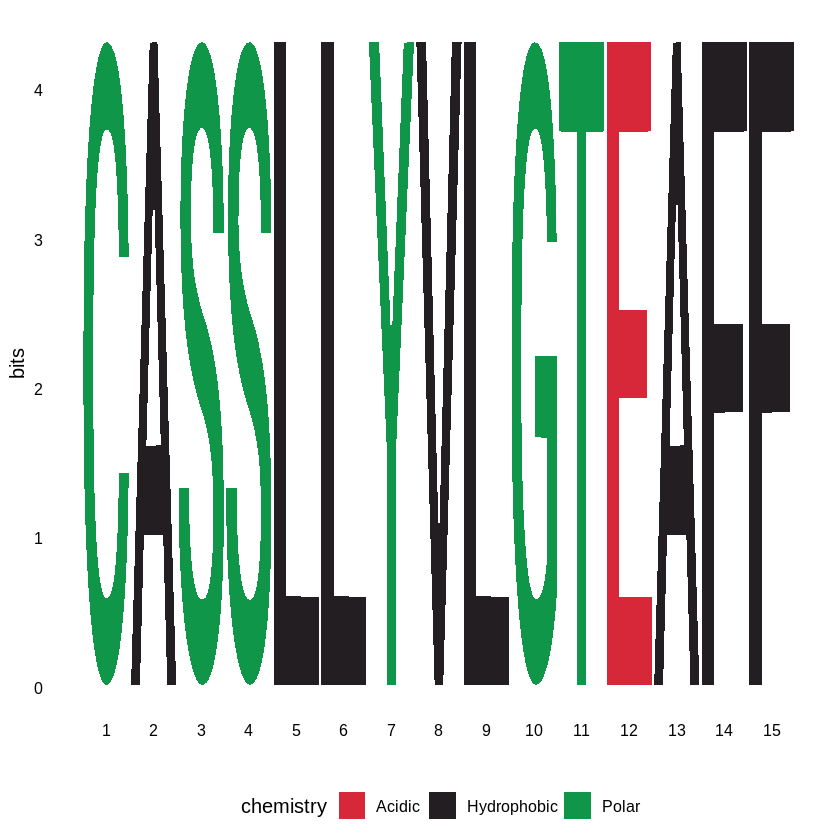

In [64]:
visualize_motif(seq_len)

#Notes
For all
Pos 1-4 ; conserved
Pos 13: conserved
# Pos
11-13 variable
: quantitative metric averaged by group to confirm null-hypothesis

In [65]:
#Iwish#library(motifStack)